<div class="alert alert-block alert-success">
<h2>Nama : Salwa Ayu Rafika</h2>
<h2>NIM    : 09011181924012</h2>  
<h2>Project Akhir UAS Mata Kuliah Jaringan Saraf Tiruan</h2>  
</div>

<div class="alert alert-block alert-danger">
<h2>KLASIFIKASI KANKER SERVIKS MENGGUNAKAN CONVOLUTIONAL NEURAL NETWORK DENGAN ARSITEKTUR XCEPTION</h2>
</div>

## Import Library

Langkah pertama yang dilakukan ialah mengimport library-library yang diperlukan. Dalam hal ini secara umum library yang dipakai terdiri dari library numpy, matplotlib, sklearn dan tensorflow keras. 

Library pada Python merupakan sebutan untuk kode program tambahan yang digunakan dalam kebutuhan tertentu. Python mempunyai lebih dari 140.000 library yang dikembangkan melalui open source project. 

* Library Numpy memiliki kegunaan untuk operasi vektor dan matriks. Fiturnya hampir sama dengan MATLAB dalam mengelola array dan array multidimensi.
* Library Matplotlib adalah salah satu library Python yang komprehensif serta berguna untuk membuat visualisasi data yang statis dan interaktif dalam bentuk 2D maupun 3D. 
* Library Scikit-learn (Sklearn) merupakan Package ini menyediakan pilihan alat yang efisien untuk machine learning seperti klasifikasi, regresi, clustering, dan dimension reduction melalui antarmuka konsistensi dengan Python.
* Keras adalah library Python tingkat tinggi yang ringkas, mudah dipelajari, yang dijalankan di atas framework TensorFlow.

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import cv2
warnings.filterwarnings(action="ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.xception import preprocess_input

## Load Dataset

Langkah kedua, yaitu load data (memuat data). Pada proses ini memuat contoh sample data dari dataset. Adapun dataset yang digunakan pada project ini ialah dataset dari ISYS-RG pada link https://drive.google.com/drive/folders/1Jmhvxd1iMjlXFtC_K5rDpxUhPHnVR4CL?usp=sharing. Dataset tersebut terbagi menjadi Data Training dan Data Testing yang terdiri menjadi 2 kelas yaitu kelas abnormal dan kelas normal.

#### Dataset Train

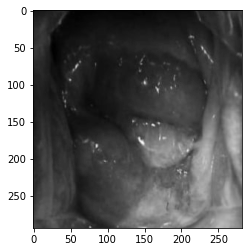

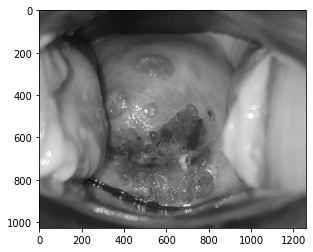

In [10]:
DIR = "C:/Users/lenovo/OneDrive/Documents/dataset/train"
CATEGORIES = ["abnormal","normal"]

for category in CATEGORIES:
    path = os.path.join(DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

#### Dataset Test

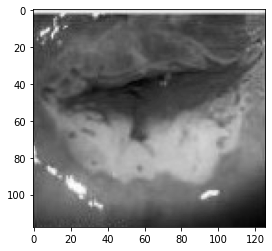

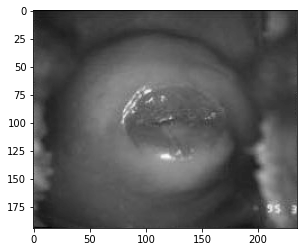

In [11]:
DIR2 = "C:/Users/lenovo/OneDrive/Documents/dataset/test"
CATEGORIES2 = ["abnormal","normal"]

for category in CATEGORIES2:
    path = os.path.join(DIR2, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break

## Data Exploration

Pada tahap ini merupakan proses untuk mengeksplorasi dataset meliputi menghitung jumlah data dan membuat bar plot untuk mengetahui distribusi data.

### 1. Lihat Jumlah Data

In [2]:
train_path = "C:/Users/lenovo/OneDrive/Documents/dataset/train"
test_path = "C:/Users/lenovo/OneDrive/Documents/dataset/test"

In [3]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;

train_set = GetDatasetSize(train_path)
test_set = GetDatasetSize(test_path)

print(train_set,"\n\n",test_set)

{'abnormal': 3103, 'normal': 2789} 

 {'abnormal': 96, 'normal': 67}


**Dataset Training**
* Jumlah data pada kelas abnormal berjumlah 3103, jumlah data pada kelas normal berjumlah 2789

**Dataset Testing**
* Jumlah data pada kelas abnormal berjumlah 96, jumlah data pada kelas normal berjumlah 67

### 2. Lihat Distribusi Data dengan Plot

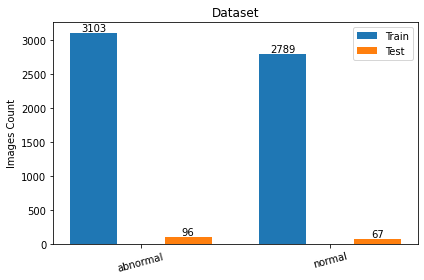

In [9]:
labels = ['abnormal','normal']
train_list = list(train_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

## Preprocessing

### 1. Cek Dataset

Pada tahap ini merupakan tahap pengecekan satu per satu file gambar dari dataset. Jika pada file gambar terdapat noise seperti gambar yang terpotong, format esktensi yang salah dan kesalahan yang lainnya, akan di hapus menggunakan fungsi coding di bawah ini.

In [10]:
import os
from PIL import Image
folder_path = 'C:/Users/lenovo/OneDrive/Documents/dataset/train'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
    

In [11]:
import os
from PIL import Image
folder_path = 'C:/Users/lenovo/OneDrive/Documents/dataset/test'
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])
    

### 2. Data Augmentation

Augmentasi Gambar adalah cara menerapkan berbagai jenis teknik transformasi pada gambar. Teknik ini membantu melatih model deep
learning pada lebih banyak variasi gambar daripada yang ada dalam dataset sebenarnya. Pada bagian ini file dari dataset akan lebih lanjut di proses dengan menggunakan library imagedatagenerator dari keras. Operasi yang dilakukan seperti rotasi, target_size, translasi, geser, color_mode, rescale, batch_size, zoom range dan lainnya.

In [18]:
# Set some important constants here
IMAGE_SIZE = 240
N_CLASSES = 2
BATCH_SIZE = 5

In [66]:
datagen = ImageDataGenerator(dtype='float32', preprocessing_function=preprocess_input,validation_split=0.2) 

train_data= datagen.flow_from_directory('C:/Users/lenovo/OneDrive/Documents/dataset/train',
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                                   class_mode = 'categorical',
                                                   subset='training',
                                                   color_mode = "rgb",
                                                   seed = 123)


valid_data = datagen.flow_from_directory('C:/Users/lenovo/OneDrive/Documents/dataset/train',
                                            batch_size = BATCH_SIZE,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            class_mode = 'categorical',
                                            color_mode = "rgb",
                                            subset='validation',
                                            seed = 123)

test_data = datagen.flow_from_directory('C:/Users/lenovo/OneDrive/Documents/dataset/test',
                                         target_size=(240, 240),
                                        class_mode='categorical',
                                        shuffle=False)
                                        

Found 4714 images belonging to 2 classes.
Found 1177 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [20]:
train_data.class_indices
test_data.class_indices

{'abnormal': 0, 'normal': 1}

## Visualisasi Data Setelah Preprocessing

In [21]:
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, array_to_img, img_to_array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


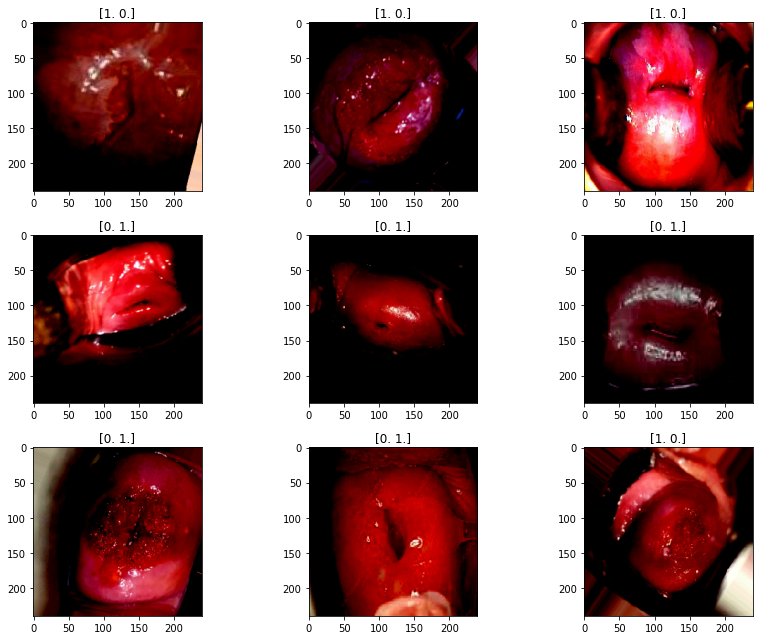

In [23]:
fit, ax = plt.subplots(nrows=3, ncols=3, figsize=(12,9))

for i, a in enumerate(ax.flat):
    img, label = train_data.next()
    a.imshow(img[0],)
    a.set_title(label[0])

plt.tight_layout()
plt.show()

Tampilan Gambar diatas merupakan hasil dari proses Preprocessing dan Data Augmentation. Dapat dilihat diatas bahwa gambar tersebut masing-masing memiliki ukuran yang sama, mode warna diubah menjadi RGB dan diatasnya terdapat labelnya [abnormal, normal] 

## Model Deploy

Xception adalah arsitektur jaringan saraf convolutional mendalam yang melibatkan Depthwise Separable Convolutions. Jaringan ini diperkenalkan Francois Chollet yang bekerja di Google, Inc. Xception adalah singkatan dari "extreme inception", dibutuhkan prinsip-prinsip Inception menjadi ekstrim. Di Inception, konvolusi 1x1 digunakan untuk mengompresi input asli, dan dari masing-masing ruang input tersebut kami menggunakan jenis filter yang berbeda pada setiap ruang kedalaman. Xception hanya membalikkan langkah ini. Sebagai gantinya, ini pertama-tama menerapkan filter pada masing-masing peta kedalaman dan akhirnya mengompresi ruang input menggunakan konvolusi 1X1 dengan menerapkannya di seluruh kedalaman.

**Layer Keras**
* Layer Global Average Pooling adalah operasi pooling yang dirancang untuk menggantikan fully connected layers di classical CNNs
* Layer Dropout merupakan Teknik di mana neuron yang dipilih secara acak diabaikan selama pelatihan
* Layer Dense merupakan lapisan neural network yang terhubung secara mendalam, yang setiap neuron pada denselayer menerima input dari semua neuron pada lapisan sebelumnya.

In [25]:
from tensorflow.keras.layers import Flatten, Dense, Conv2D, Dropout, GlobalAveragePooling2D

In [27]:
#build the model
xcep_model = Xception(weights='imagenet', 
                    include_top=False, 
                    input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

model = xcep_model.output
model = GlobalAveragePooling2D()(model)
model = Dropout(0.5)(model)
model = Dense(2, activation='softmax')(model)
model = Model(inputs=xcep_model.input, 
              outputs=model)

#get summary()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 240, 240, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 119, 119, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 119, 119, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [33]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [34]:
#compile model
model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#define checkpoint
checkpoint = ModelCheckpoint('modelXception_2Class.h5', 
                             monitor='val_accuracy',
                             save_best_only=True,
                             mode='auto',
                             verbose=1)

#early stopping
earlystop = EarlyStopping(monitor='val_accuracy',
                          patience=5,
                          mode='auto',
                          verbose=1)

#reduce learning rate
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', 
                              factor = 0.70, 
                              patience = 5, 
                              min_delta = 0.0001,
                              mode='auto',
                              verbose=1)

**Model Compile :** adalah langkah terakhir dalam membuat model. Setelah kompilasi selesai, kita dapat melanjutkan ke fase pelatihan.
* Optimizer adalah proses penting yang mengoptimalkan bobot input dengan membandingkan prediksi dan loss function.
* Loss digunakan untuk menemukan kesalahan atau penyimpangan dalam proses pembelajaran. Keras membutuhkan fungsi loss selama proses kompilasi model.
* Metrics digunakan untuk mengevaluasi performa model Anda. Ini mirip dengan fungsi kerugian, tetapi tidak digunakan dalam proses pelatihan.

**ModelCheckpointcallback :** :digunakan bersama dengan penggunaan pelatihan model.fit()untuk menyimpan model atau bobot (dalam file pos pemeriksaan) pada beberapa interval

**EarlyStopping :** Strategi dalam pembelajaran mesin untuk menghindari overfitting dengan menghentikan pelatihan model saat kesalahan merata. Atau ketika perbedaan antara set pelatihan dan validasi meningkat.

**ReduceLROnPlateau :** Kurangi kecepatan pembelajaran saat metrik berhenti meningkat. Model sering mendapat manfaat dari pengurangan tingkat pembelajaran dengan faktor 2-10 setelah pembelajaran mandek.

In [37]:
%%time

#train the model
history = model.fit(train_data,
                    epochs = 15,
                    validation_data=valid_data,
                    steps_per_epoch = len(train_data)//BATCH_SIZE,
                    verbose=1,
                    callbacks=[checkpoint, reduce_lr])

Epoch 1/15
235/235 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.5770
Epoch 00001: val_accuracy improved from -inf to 0.61963, saving model to modelXception_2Class.h5
235/235 [==============================] - 815s 3s/step - loss: 0.6943 - accuracy: 0.5770 - val_loss: 0.6560 - val_accuracy: 0.6196 - lr: 0.0010
Epoch 2/15
235/235 [==============================] - ETA: 0s - loss: 0.6544 - accuracy: 0.6145
Epoch 00002: val_accuracy improved from 0.61963 to 0.66871, saving model to modelXception_2Class.h5
235/235 [==============================] - 803s 3s/step - loss: 0.6544 - accuracy: 0.6145 - val_loss: 0.6232 - val_accuracy: 0.6687 - lr: 0.0010
Epoch 3/15
235/235 [==============================] - ETA: 0s - loss: 0.6193 - accuracy: 0.6579
Epoch 00003: val_accuracy did not improve from 0.66871
235/235 [==============================] - 783s 3s/step - loss: 0.6193 - accuracy: 0.6579 - val_loss: 0.6246 - val_accuracy: 0.6442 - lr: 0.0010
Epoch 4/15
235/235 [=====

In [51]:
# hasil akurasi model pada data training
print('Train accuracy & loss:', model.evaluate(train_data))

1179/1179 [==============================] - 795s 674ms/step - loss: 0.1390 - accuracy: 0.9538
Train accuracy & loss: [0.13896788656711578, 0.9538278579711914]


In [38]:
hist_df = pd.DataFrame(history.history) 
# save to json:  
hist_json_file = 'history_2Class_Xception.json' 
with open(hist_json_file, mode='w') as f:
    hist_df.to_json(f)

# or save to csv: 
hist_csv_file = 'history_2Class_Xception.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

## Evaluasi Model Training

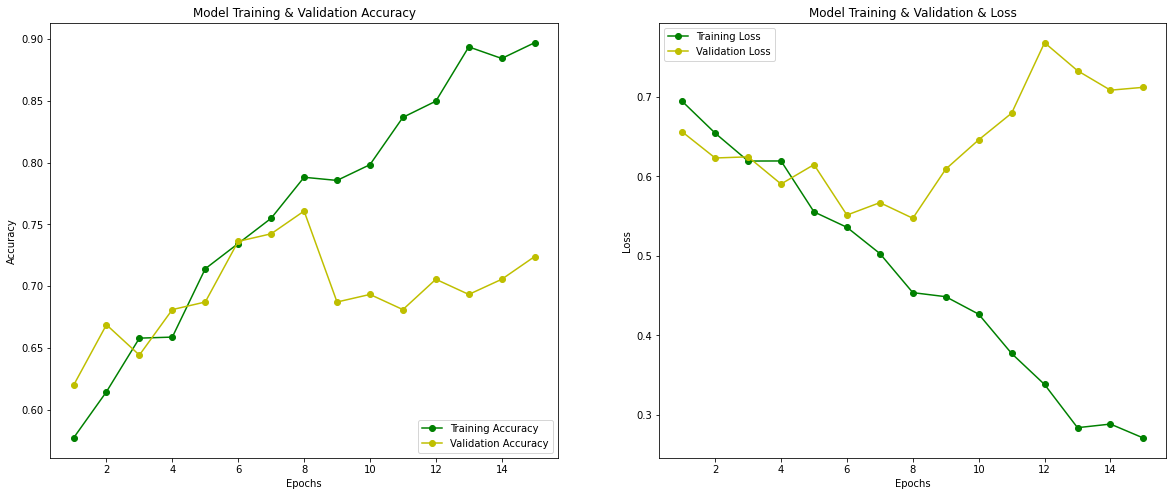

In [39]:
fig , ax = plt.subplots(1,2)
fig.set_size_inches(20, 8)

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'g-o' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'y-o' , label = 'Validation Accuracy')
ax[0].set_title('Model Training & Validation Accuracy')
ax[0].legend(loc = 'lower right')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'y-o' , label = 'Validation Loss')
ax[1].set_title('Model Training & Validation & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")

plt.show()

## Obtaining Predictions on Test Images

In [40]:
test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=preprocess_input)
X_test = test_datagen.flow_from_directory(test_path,
                                            batch_size = BATCH_SIZE,
                                            target_size = (IMAGE_SIZE, IMAGE_SIZE),
                                            class_mode = 'categorical',
                                            color_mode = "rgb",
                                            seed = 123)


Found 163 images belonging to 2 classes.


### Hasil akurasi dari prediksi model pada data test

In [41]:
res = model.evaluate(X_test)

33/33 [==============================] - 20s 602ms/step - loss: 0.7120 - accuracy: 0.7239


In [52]:
# hasil akurasi model pada data testing
print('Train accuracy & loss:', model.evaluate(test_data))

33/33 [==============================] - 23s 690ms/step - loss: 0.7120 - accuracy: 0.7239
Train accuracy & loss: [0.7119934558868408, 0.7239263653755188]


In [56]:
#define labels for testing
y_test = test_generator.classes

#make prediction
yhat_test = np.argmax(model.predict(test_generator), axis=1)

In [43]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [57]:
# array hasil prediksi model, angka 0 menunjukkan abnormal dan angka 1 menunjukan normal
yhat_test

array([0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Evaluasi Kinerja Model Pada Data Uji (Data Test)

In [59]:
# Parameter evaluasi yang digunakan ialah akurasi, recall, f1 score dan precision

from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, yhat_test))


              precision    recall  f1-score   support

           0       0.57      0.53      0.55        96
           1       0.39      0.43      0.41        67

    accuracy                           0.49       163
   macro avg       0.48      0.48      0.48       163
weighted avg       0.50      0.49      0.49       163



<AxesSubplot:>

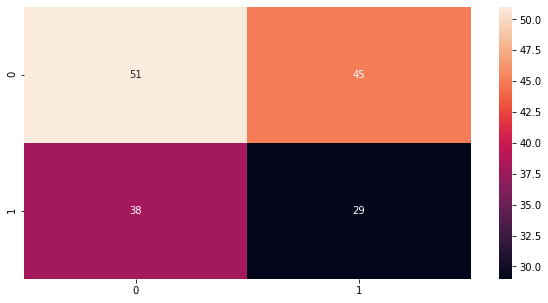

In [58]:
# Confussion Matriks digunakan untuk melihat jumlah prediksi benar (TP & TN) dan prediksi salah (FP & FN)
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize = (10,5))
cm = confusion_matrix(y_test, yhat_test)
sns.heatmap(cm, annot=True, fmt = 'g')

Model dapat memprediksi dengan benar sebanyak 80 data yang terdiri dari 51 memprediksi benar kelas abnormal dan 29 memprediksi
benar kelas normal
